In [1]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from metrics import top_3_acc
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
DATASET_PATH = "/Users/filipgulan/Downloads/test"

In [3]:
model = load_model('../models/model.hdf5',custom_objects={'top_3_acc': top_3_acc})

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', top_3_acc])

In [4]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {
 'Albertsons': 0,
 'BJs': 1,
 'CVSPharmacy': 2,
 'Costco': 3,
 'FredMeyer': 4,
 'Frys': 5,
 'HEB': 6,
 'HarrisTeeter': 7,
 'HyVee': 8,
 'JewelOsco': 9,
 'KingSoopers': 10,
 'Kroger': 11,
 'Meijer': 12,
 'NonReceipt': 13,
 'Publix': 14,
 'Safeway': 15,
 'SamsClub': 16,
 'ShopRite': 17,
 'Smiths': 18,
 'StopShop': 19,
 'Target': 20,
 'Walgreens': 21,
 'Walmart': 22,
 'Wegmans': 23,
 'WholeFoodsMarket': 24,
 'WinCoFoods': 25}

class_labels = {v: k for k, v in labels.items()}

In [7]:
input_size = (299, 164)
batch_size = 100

def preprocess_image(img):
    return img
    #img_array = img_to_array(img)
    # TODO: Preprocessing
    #return array_to_img(img_array)
    
datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                             samplewise_center=True,
                             samplewise_std_normalization=True)

gen_flow = datagen.flow_from_directory(
        DATASET_PATH, 
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

predict = model.predict_generator(gen_flow, steps=1)
predicted_classes = np.argmax(predict, axis=1)

Found 10000 images belonging to 1 classes.


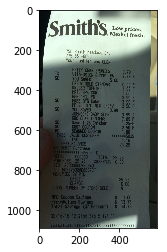

Filename: Dataset/0.jpg
Top 1 class: Smiths conf: 0.9999982
Top 2 class: Safeway conf: 1.7943149e-06
Top 3 class: Publix conf: 1.9726473e-08


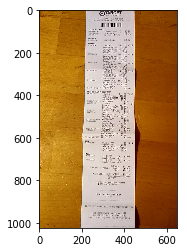

Filename: Dataset/1.jpg
Top 1 class: Target conf: 1.0
Top 2 class: Meijer conf: 5.894801e-11
Top 3 class: FredMeyer conf: 2.6689364e-11


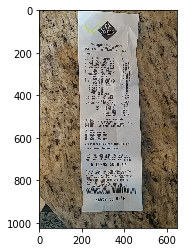

Filename: Dataset/10.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: Walmart conf: 1.9516173e-09
Top 3 class: ShopRite conf: 2.9658737e-11


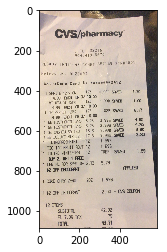

Filename: Dataset/100.jpg
Top 1 class: CVSPharmacy conf: 1.0
Top 2 class: Safeway conf: 8.528773e-12
Top 3 class: JewelOsco conf: 1.5093511e-12


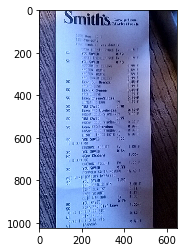

Filename: Dataset/1000.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Safeway conf: 5.6650407e-11
Top 3 class: Albertsons conf: 7.185164e-13


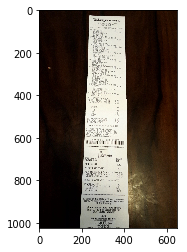

Filename: Dataset/1001.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: Frys conf: 4.8596045e-12
Top 3 class: CVSPharmacy conf: 1.5560992e-12


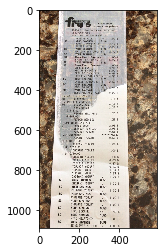

Filename: Dataset/1002.jpg
Top 1 class: Frys conf: 1.0
Top 2 class: Safeway conf: 2.6013473e-12
Top 3 class: CVSPharmacy conf: 1.9663574e-13


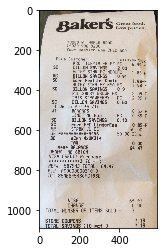

Filename: Dataset/1003.jpg
Top 1 class: Frys conf: 0.6057126
Top 2 class: KingSoopers conf: 0.28101736
Top 3 class: Smiths conf: 0.062117722


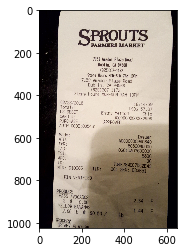

Filename: Dataset/1004.jpg
Top 1 class: WholeFoodsMarket conf: 0.99750656
Top 2 class: Publix conf: 0.0010792402
Top 3 class: HyVee conf: 0.00052676076


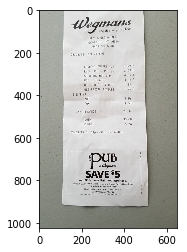

Filename: Dataset/1005.jpg
Top 1 class: Wegmans conf: 1.0
Top 2 class: WinCoFoods conf: 6.1485665e-12
Top 3 class: Safeway conf: 2.5670789e-14


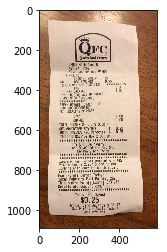

Filename: Dataset/1006.jpg
Top 1 class: KingSoopers conf: 0.8392888
Top 2 class: BJs conf: 0.13531916
Top 3 class: Smiths conf: 0.02233913


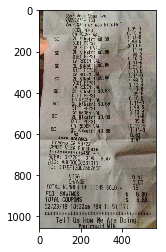

Filename: Dataset/1007.jpg
Top 1 class: Frys conf: 0.92311245
Top 2 class: Smiths conf: 0.07303122
Top 3 class: KingSoopers conf: 0.002875651


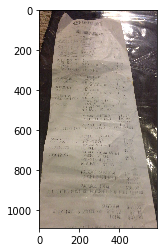

Filename: Dataset/1008.jpg
Top 1 class: Target conf: 1.0
Top 2 class: Meijer conf: 1.1963586e-09
Top 3 class: Safeway conf: 1.8401353e-10


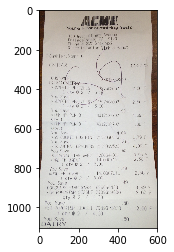

Filename: Dataset/1009.jpg
Top 1 class: JewelOsco conf: 0.99695826
Top 2 class: HyVee conf: 0.0009961702
Top 3 class: Meijer conf: 0.00070615544


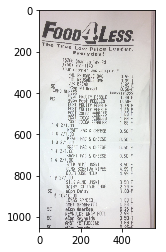

Filename: Dataset/101.jpg
Top 1 class: KingSoopers conf: 0.9627334
Top 2 class: Smiths conf: 0.022547545
Top 3 class: FredMeyer conf: 0.007270073


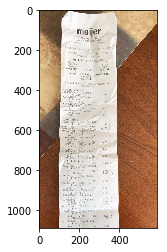

Filename: Dataset/1010.jpg
Top 1 class: Meijer conf: 1.0
Top 2 class: JewelOsco conf: 6.188041e-11
Top 3 class: HyVee conf: 8.291146e-12


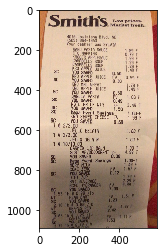

Filename: Dataset/1011.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Safeway conf: 7.4994325e-12
Top 3 class: Albertsons conf: 2.2629429e-14


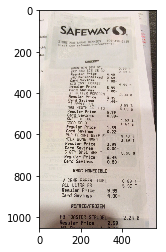

Filename: Dataset/1012.jpg
Top 1 class: Safeway conf: 1.0
Top 2 class: Albertsons conf: 3.6670136e-11
Top 3 class: StopShop conf: 6.9163127e-13


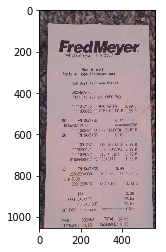

Filename: Dataset/1013.jpg
Top 1 class: FredMeyer conf: 1.0
Top 2 class: Smiths conf: 6.8511835e-11
Top 3 class: Albertsons conf: 1.5313964e-11


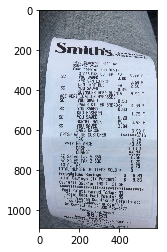

Filename: Dataset/1014.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Safeway conf: 7.922482e-14
Top 3 class: KingSoopers conf: 3.4285704e-15


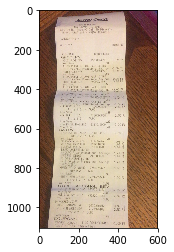

Filename: Dataset/1015.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: CVSPharmacy conf: 6.098128e-18
Top 3 class: Safeway conf: 1.7261484e-19


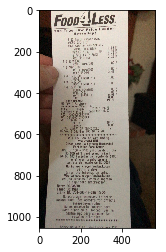

Filename: Dataset/1016.jpg
Top 1 class: FredMeyer conf: 0.57535076
Top 2 class: KingSoopers conf: 0.32518885
Top 3 class: Smiths conf: 0.048107415


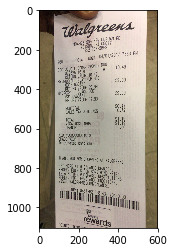

Filename: Dataset/1017.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: Albertsons conf: 5.9153615e-13
Top 3 class: CVSPharmacy conf: 1.6977002e-14


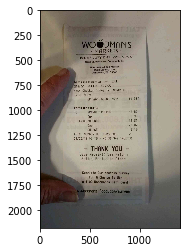

Filename: Dataset/1018.jpg
Top 1 class: BJs conf: 0.32749343
Top 2 class: Frys conf: 0.21968739
Top 3 class: HyVee conf: 0.124088936


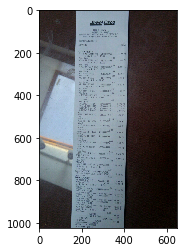

Filename: Dataset/1019.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: CVSPharmacy conf: 3.461796e-14
Top 3 class: HarrisTeeter conf: 1.5103863e-14


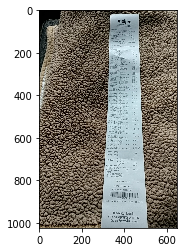

Filename: Dataset/102.jpg
Top 1 class: Meijer conf: 0.7979133
Top 2 class: HEB conf: 0.20090851
Top 3 class: BJs conf: 0.000511704


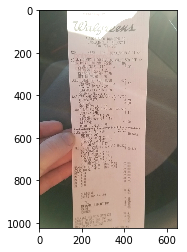

Filename: Dataset/1020.jpg
Top 1 class: Walgreens conf: 0.999998
Top 2 class: Publix conf: 1.2660025e-06
Top 3 class: CVSPharmacy conf: 3.081848e-07


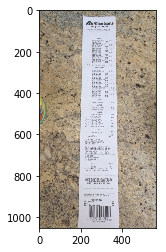

Filename: Dataset/1021.jpg
Top 1 class: Albertsons conf: 0.99998343
Top 2 class: Safeway conf: 1.3123496e-05
Top 3 class: FredMeyer conf: 2.3354667e-06


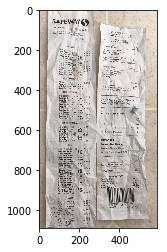

Filename: Dataset/1022.jpg
Top 1 class: Safeway conf: 0.9982286
Top 2 class: HEB conf: 0.00072631944
Top 3 class: FredMeyer conf: 0.00059278036


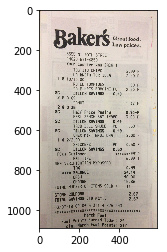

Filename: Dataset/1023.jpg
Top 1 class: Smiths conf: 0.9343523
Top 2 class: Frys conf: 0.059599526
Top 3 class: KingSoopers conf: 0.0044973693


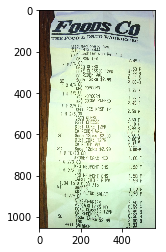

Filename: Dataset/1024.jpg
Top 1 class: KingSoopers conf: 0.9959266
Top 2 class: Safeway conf: 0.0025565536
Top 3 class: Costco conf: 0.00081956794


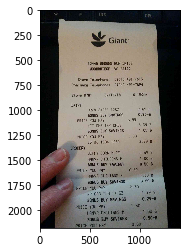

Filename: Dataset/1025.jpg
Top 1 class: StopShop conf: 1.0
Top 2 class: Safeway conf: 5.900727e-12
Top 3 class: Kroger conf: 1.07835493e-13


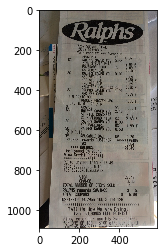

Filename: Dataset/1026.jpg
Top 1 class: HEB conf: 0.9542511
Top 2 class: Smiths conf: 0.042976063
Top 3 class: KingSoopers conf: 0.002258458


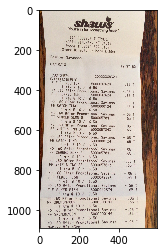

Filename: Dataset/1027.jpg
Top 1 class: JewelOsco conf: 0.9950228
Top 2 class: WinCoFoods conf: 0.0049247076
Top 3 class: NonReceipt conf: 2.2721828e-05


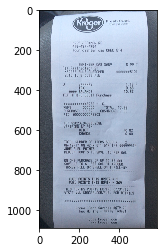

Filename: Dataset/1028.jpg
Top 1 class: Kroger conf: 1.0
Top 2 class: Frys conf: 7.849106e-12
Top 3 class: Smiths conf: 4.6406767e-12


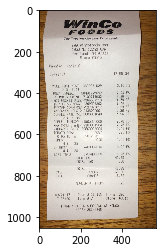

Filename: Dataset/1029.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: WholeFoodsMarket conf: 9.85124e-12
Top 3 class: JewelOsco conf: 1.1436506e-12


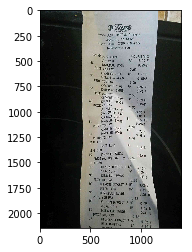

Filename: Dataset/103.jpg
Top 1 class: Publix conf: 0.503783
Top 2 class: Meijer conf: 0.34836343
Top 3 class: Frys conf: 0.051302716


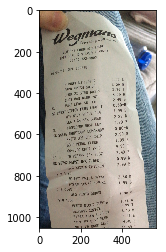

Filename: Dataset/1030.jpg
Top 1 class: Wegmans conf: 1.0
Top 2 class: Costco conf: 5.9051913e-10
Top 3 class: Safeway conf: 1.4216792e-12


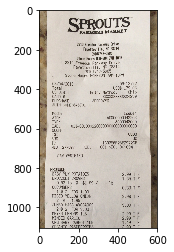

Filename: Dataset/1031.jpg
Top 1 class: WholeFoodsMarket conf: 0.9985226
Top 2 class: HyVee conf: 0.0014640506
Top 3 class: Costco conf: 8.787554e-06


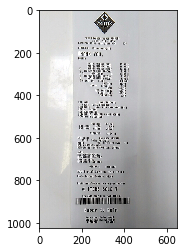

Filename: Dataset/1032.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: Walmart conf: 3.9424528e-08
Top 3 class: Meijer conf: 3.9013686e-09


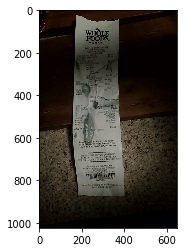

Filename: Dataset/1033.jpg
Top 1 class: WholeFoodsMarket conf: 0.9999994
Top 2 class: Walmart conf: 4.2816552e-07
Top 3 class: WinCoFoods conf: 1.4803835e-07


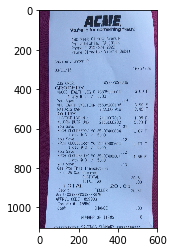

Filename: Dataset/1034.jpg
Top 1 class: JewelOsco conf: 0.99992335
Top 2 class: WinCoFoods conf: 7.4616466e-05
Top 3 class: HyVee conf: 1.5268047e-06


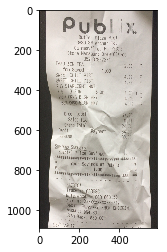

Filename: Dataset/1035.jpg
Top 1 class: Publix conf: 1.0
Top 2 class: Safeway conf: 1.2161085e-11
Top 3 class: HEB conf: 9.1708386e-14


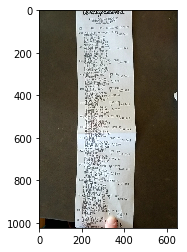

Filename: Dataset/1036.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: Albertsons conf: 3.4704434e-10
Top 3 class: Frys conf: 7.480365e-11


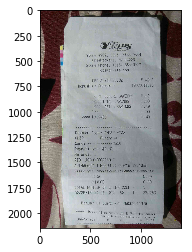

Filename: Dataset/1037.jpg
Top 1 class: Target conf: 0.39581668
Top 2 class: Publix conf: 0.3208859
Top 3 class: BJs conf: 0.12916584


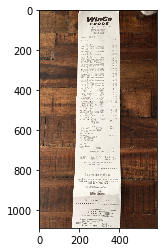

Filename: Dataset/1038.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: Wegmans conf: 5.1070964e-14
Top 3 class: WholeFoodsMarket conf: 1.3423767e-14


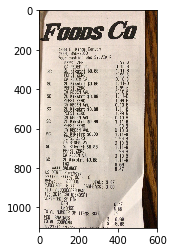

Filename: Dataset/1039.jpg
Top 1 class: Frys conf: 0.4966921
Top 2 class: Smiths conf: 0.48375902
Top 3 class: FredMeyer conf: 0.014558134


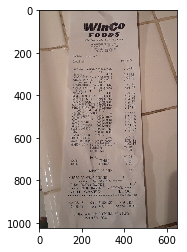

Filename: Dataset/104.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: JewelOsco conf: 6.3116897e-15
Top 3 class: WholeFoodsMarket conf: 1.9386412e-15


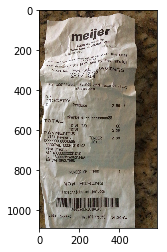

Filename: Dataset/1040.jpg
Top 1 class: Meijer conf: 1.0
Top 2 class: CVSPharmacy conf: 5.9235e-10
Top 3 class: Walmart conf: 5.494352e-10


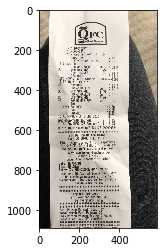

Filename: Dataset/1041.jpg
Top 1 class: KingSoopers conf: 0.90403366
Top 2 class: Frys conf: 0.06578544
Top 3 class: Smiths conf: 0.028124532


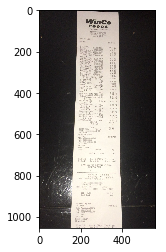

Filename: Dataset/1042.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: WholeFoodsMarket conf: 3.0216934e-12
Top 3 class: Wegmans conf: 8.1966264e-13


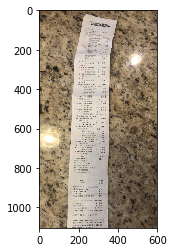

Filename: Dataset/1043.jpg
Top 1 class: HarrisTeeter conf: 0.999982
Top 2 class: Wegmans conf: 1.7632929e-05
Top 3 class: ShopRite conf: 1.9139833e-07


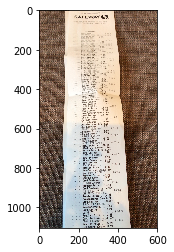

Filename: Dataset/1044.jpg
Top 1 class: Safeway conf: 0.9999958
Top 2 class: KingSoopers conf: 2.8705203e-06
Top 3 class: StopShop conf: 9.43882e-07


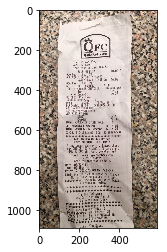

Filename: Dataset/1045.jpg
Top 1 class: BJs conf: 0.49425095
Top 2 class: KingSoopers conf: 0.23156771
Top 3 class: FredMeyer conf: 0.17733116


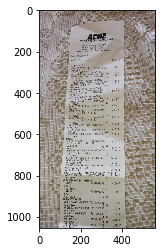

Filename: Dataset/1046.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: WinCoFoods conf: 5.0588094e-09
Top 3 class: Safeway conf: 2.409999e-13


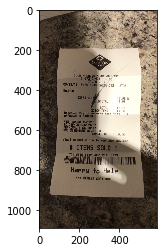

Filename: Dataset/1047.jpg
Top 1 class: SamsClub conf: 0.99999976
Top 2 class: Meijer conf: 1.069711e-07
Top 3 class: Walmart conf: 9.513935e-08


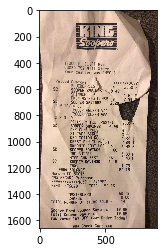

Filename: Dataset/1048.jpg
Top 1 class: KingSoopers conf: 0.62030333
Top 2 class: HarrisTeeter conf: 0.3492299
Top 3 class: ShopRite conf: 0.016771525


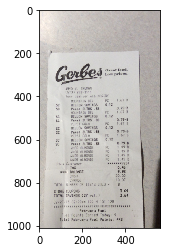

Filename: Dataset/1049.jpg
Top 1 class: Costco conf: 0.901653
Top 2 class: Frys conf: 0.043552943
Top 3 class: Smiths conf: 0.035397556


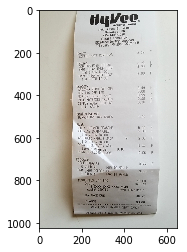

Filename: Dataset/105.jpg
Top 1 class: HyVee conf: 1.0
Top 2 class: Safeway conf: 1.7019842e-09
Top 3 class: WinCoFoods conf: 4.3408976e-10


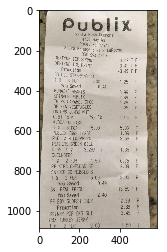

Filename: Dataset/1050.jpg
Top 1 class: Publix conf: 1.0
Top 2 class: HyVee conf: 1.8835499e-14
Top 3 class: Frys conf: 1.24453975e-14


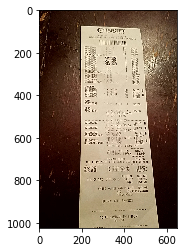

Filename: Dataset/1051.jpg
Top 1 class: Target conf: 0.99999905
Top 2 class: Publix conf: 6.6892676e-07
Top 3 class: NonReceipt conf: 1.5191966e-07


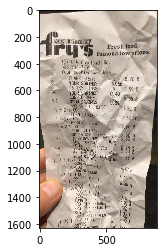

Filename: Dataset/1052.jpg
Top 1 class: Frys conf: 0.9999969
Top 2 class: CVSPharmacy conf: 1.9146298e-06
Top 3 class: HyVee conf: 6.5190034e-07


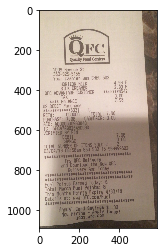

Filename: Dataset/1053.jpg
Top 1 class: KingSoopers conf: 0.95159775
Top 2 class: BJs conf: 0.022311796
Top 3 class: Frys conf: 0.022251107


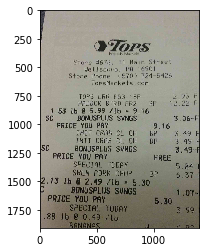

Filename: Dataset/1054.jpg
Top 1 class: HEB conf: 0.41871423
Top 2 class: Meijer conf: 0.2431578
Top 3 class: ShopRite conf: 0.13839158


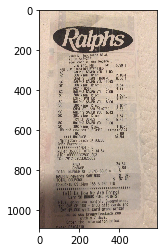

Filename: Dataset/1055.jpg
Top 1 class: Smiths conf: 0.9651992
Top 2 class: KingSoopers conf: 0.016115036
Top 3 class: HEB conf: 0.012630899


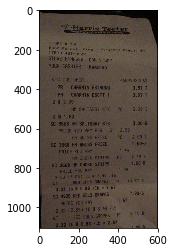

Filename: Dataset/1056.jpg
Top 1 class: HarrisTeeter conf: 1.0
Top 2 class: JewelOsco conf: 1.7413588e-09
Top 3 class: CVSPharmacy conf: 1.1820726e-10


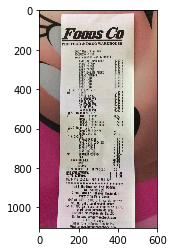

Filename: Dataset/1057.jpg
Top 1 class: KingSoopers conf: 0.9324349
Top 2 class: Smiths conf: 0.064443134
Top 3 class: Safeway conf: 0.0013927524


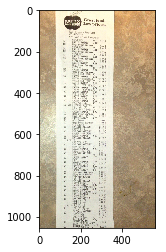

Filename: Dataset/1058.jpg
Top 1 class: Kroger conf: 0.998777
Top 2 class: Frys conf: 0.0012222382
Top 3 class: KingSoopers conf: 8.793151e-07


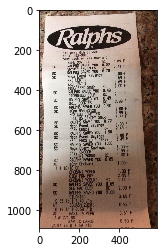

Filename: Dataset/1059.jpg
Top 1 class: HEB conf: 0.96319824
Top 2 class: Smiths conf: 0.019612942
Top 3 class: KingSoopers conf: 0.010095347


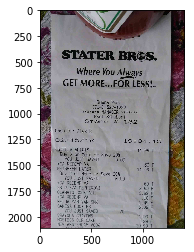

Filename: Dataset/106.jpg
Top 1 class: NonReceipt conf: 0.3851754
Top 2 class: WholeFoodsMarket conf: 0.37509382
Top 3 class: Albertsons conf: 0.05993945


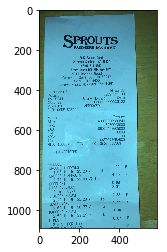

Filename: Dataset/1060.jpg
Top 1 class: WholeFoodsMarket conf: 0.99934596
Top 2 class: HyVee conf: 0.0002734926
Top 3 class: Albertsons conf: 0.00014079374


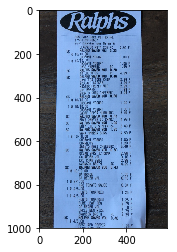

Filename: Dataset/1061.jpg
Top 1 class: Smiths conf: 0.4703727
Top 2 class: HEB conf: 0.38893428
Top 3 class: Kroger conf: 0.092044145


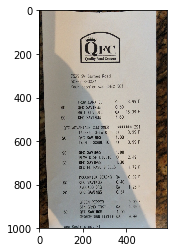

Filename: Dataset/1062.jpg
Top 1 class: KingSoopers conf: 0.58470064
Top 2 class: Kroger conf: 0.22062068
Top 3 class: ShopRite conf: 0.13718207


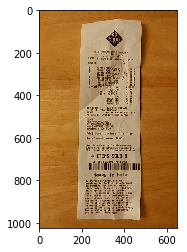

Filename: Dataset/1063.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: ShopRite conf: 5.2153573e-11
Top 3 class: Walmart conf: 3.7345564e-11


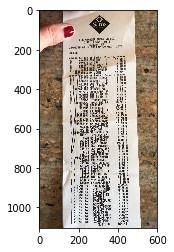

Filename: Dataset/1064.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: Costco conf: 8.669493e-09
Top 3 class: Wegmans conf: 2.1814127e-10


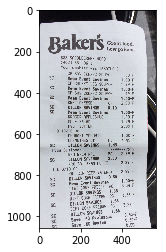

Filename: Dataset/1065.jpg
Top 1 class: Safeway conf: 0.6333679
Top 2 class: Smiths conf: 0.2594015
Top 3 class: Frys conf: 0.060043745


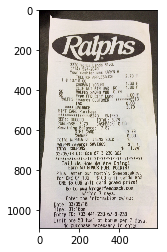

Filename: Dataset/1066.jpg
Top 1 class: HEB conf: 0.9929495
Top 2 class: Smiths conf: 0.0025339618
Top 3 class: FredMeyer conf: 0.0025183938


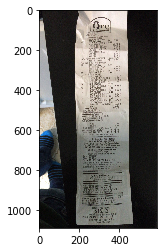

Filename: Dataset/1067.jpg
Top 1 class: Kroger conf: 0.9215408
Top 2 class: HEB conf: 0.07166471
Top 3 class: KingSoopers conf: 0.006504777


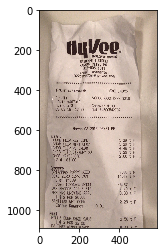

Filename: Dataset/1068.jpg
Top 1 class: HyVee conf: 1.0
Top 2 class: WinCoFoods conf: 8.331109e-12
Top 3 class: Frys conf: 5.822001e-12


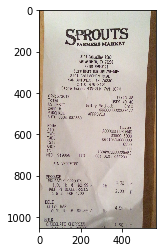

Filename: Dataset/1069.jpg
Top 1 class: WholeFoodsMarket conf: 0.99672204
Top 2 class: HyVee conf: 0.0029348696
Top 3 class: Walmart conf: 0.00014100202


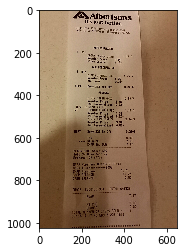

Filename: Dataset/107.jpg
Top 1 class: Albertsons conf: 0.9999982
Top 2 class: Safeway conf: 1.8243188e-06
Top 3 class: Wegmans conf: 5.539815e-09


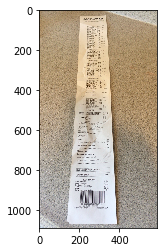

Filename: Dataset/1070.jpg
Top 1 class: Safeway conf: 1.0
Top 2 class: BJs conf: 1.6514637e-10
Top 3 class: StopShop conf: 1.30968795e-11


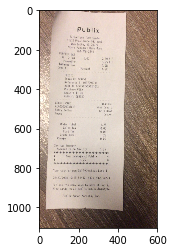

Filename: Dataset/1071.jpg
Top 1 class: Publix conf: 1.0
Top 2 class: Safeway conf: 1.517029e-11
Top 3 class: Frys conf: 1.3339917e-11


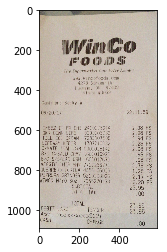

Filename: Dataset/1072.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: Wegmans conf: 8.285889e-14
Top 3 class: JewelOsco conf: 1.0809284e-14


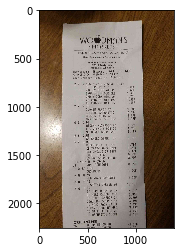

Filename: Dataset/1073.jpg
Top 1 class: StopShop conf: 0.98525107
Top 2 class: Walmart conf: 0.0047928314
Top 3 class: Wegmans conf: 0.0045935377


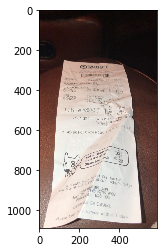

Filename: Dataset/1074.jpg
Top 1 class: Target conf: 0.99999857
Top 2 class: StopShop conf: 5.4865194e-07
Top 3 class: NonReceipt conf: 4.0092337e-07


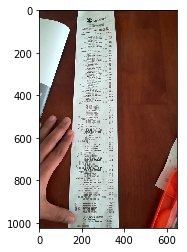

Filename: Dataset/1075.jpg
Top 1 class: StopShop conf: 0.9998529
Top 2 class: ShopRite conf: 0.0001470284
Top 3 class: BJs conf: 9.662812e-09


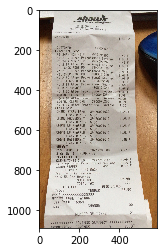

Filename: Dataset/1076.jpg
Top 1 class: JewelOsco conf: 0.99999297
Top 2 class: WinCoFoods conf: 6.9601247e-06
Top 3 class: Safeway conf: 5.5456667e-08


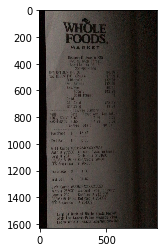

Filename: Dataset/1077.jpg
Top 1 class: WholeFoodsMarket conf: 0.9999943
Top 2 class: Smiths conf: 4.460326e-06
Top 3 class: Publix conf: 5.175685e-07


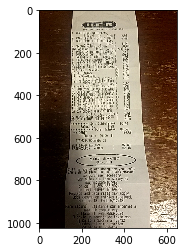

Filename: Dataset/1078.jpg
Top 1 class: HEB conf: 1.0
Top 2 class: WinCoFoods conf: 2.6976387e-14
Top 3 class: JewelOsco conf: 8.587295e-15


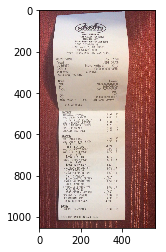

Filename: Dataset/1079.jpg
Top 1 class: WholeFoodsMarket conf: 0.8102531
Top 2 class: HyVee conf: 0.18406485
Top 3 class: Publix conf: 0.0054132123


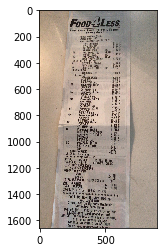

Filename: Dataset/108.jpg
Top 1 class: FredMeyer conf: 0.928972
Top 2 class: Frys conf: 0.07068463
Top 3 class: Smiths conf: 0.00022908798


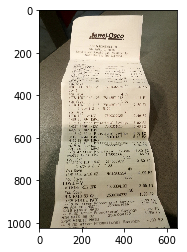

Filename: Dataset/1080.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: Meijer conf: 1.7775855e-12
Top 3 class: CVSPharmacy conf: 1.3180498e-12


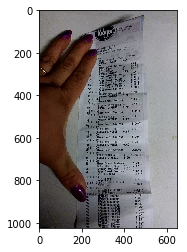

Filename: Dataset/1081.jpg
Top 1 class: Kroger conf: 1.0
Top 2 class: KingSoopers conf: 4.020636e-10
Top 3 class: ShopRite conf: 4.473926e-11


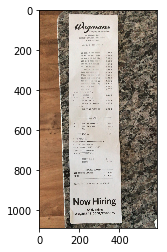

Filename: Dataset/1082.jpg
Top 1 class: Wegmans conf: 1.0
Top 2 class: Safeway conf: 6.0791995e-14
Top 3 class: Costco conf: 7.342722e-15


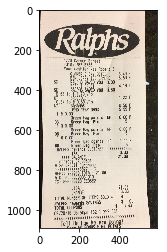

Filename: Dataset/1083.jpg
Top 1 class: KingSoopers conf: 0.95026815
Top 2 class: Smiths conf: 0.034355387
Top 3 class: HEB conf: 0.012032992


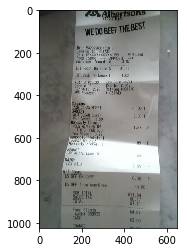

Filename: Dataset/1084.jpg
Top 1 class: Albertsons conf: 0.9970445
Top 2 class: WholeFoodsMarket conf: 0.0022867902
Top 3 class: HyVee conf: 0.000612814


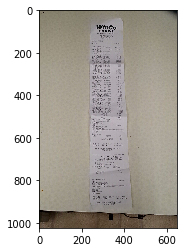

Filename: Dataset/1085.jpg
Top 1 class: WinCoFoods conf: 0.9999999
Top 2 class: WholeFoodsMarket conf: 1.09739325e-07
Top 3 class: Safeway conf: 2.2425485e-08


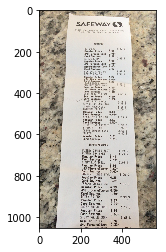

Filename: Dataset/1086.jpg
Top 1 class: Safeway conf: 1.0
Top 2 class: Albertsons conf: 3.1834206e-09
Top 3 class: StopShop conf: 9.560354e-13


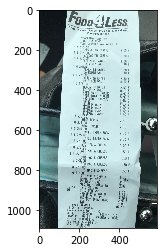

Filename: Dataset/1087.jpg
Top 1 class: CVSPharmacy conf: 0.4088765
Top 2 class: Frys conf: 0.2795338
Top 3 class: FredMeyer conf: 0.20037273


In [9]:
plt.figure()
for i, predicted in enumerate(predicted_classes):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    plt.imshow(img)
    plt.show()
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    print("Filename:", gen_flow.filenames[i])
    for j, class_indice in enumerate(reversed(top3_arg)):
        print("Top", (j+1), "class:", class_labels[class_indice], "conf:", top3[j])